# Using `pandas` to explore firm accounting data

I've given you a list of firms from 2020 with variables
- "gvkey", "lpermno", "lpermno" = different datasets use different identifiers for firms
- "fyear" = the fiscal year the remaining variable apply to 
- "gsector" = gsector, an industry classification (see [the wiki article on GICS](https://en.wikipedia.org/wiki/Global_Industry_Classification_Standard))
- "state" = of headquarters
- "tic" = ticker
- various accounting statistics

This data is a small slice of Compustat, which is a professional grade dataset that contains accounting data from SEC filings. 

In [1]:
import pandas as pd
import numpy as np #may come in handy for some of these questions

# this file can be found here: https://github.com/LeDataSciFi/ledatascifi-2021/tree/main/data
# if you click on the file, then "raw", you'll be at this url
# which contains the raw data 
# and pandas can download/load it without saving it locally!
url = 'https://raw.githubusercontent.com/LeDataSciFi/ledatascifi-2021/main/data/firms2020.csv'
firms_df = pd.read_csv(url) 

## Part 1 - create variables

Create three variables:
1. $log(sales)$
2. $leverage = (dlc+dltt)/at $
3. $capx\_ratio = capx/at$

Q1: Then `.describe()` these three variables right after creating them. (Don't do any cleaning yet! This is just a way for graders to check your definitions quickly.)

Insert cell(s) below this one as needed to finish this Part.

In [2]:
firms_df.head()

,GVKEY,LPERMNO,LPERMCO,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,...,ppent,sale,sppe,xrd,costat,prcc_f,conml,gsector,sic,state
0,1119,10065,20023,2020/12/31,2020,INDL,C,D,STD,ADX,...,NaN,NaN,NaN,NaN,A,17.29,Adams Diversified Equity Fund Inc,NaN,6726.0,MD
1,1161,61241,211,2020/12/31,2020,INDL,C,D,STD,AMD,...,849.000,9763.000,0.000,1983.0,A,91.71,Advanced Micro Devices Inc,45.0,3674.0,CA
2,1186,78223,26174,2020/12/31,2020,INDL,C,D,STD,AEM,...,7325.418,3138.113,0.936,NaN,A,70.51,Agnico Eagle Mines Ltd,15.0,1040.0,ON
3,1209,28222,20030,2020/09/30,2020,INDL,C,D,STD,APD,...,12341.500,8856.300,NaN,83.9,A,297.86,Air Products and Chemicals Inc.,15.0,2810.0,PA
4,1266,11790,153,2020/09/30,2020,INDL,C,D,STD,ALCO,...,350.835,92.507,NaN,NaN,A,28.62,Alico Inc,30.0,100.0,FL


In [3]:
#Creating three variables 

#getting runtime error cuz i can't find the log of 0 (numpy correctly ignores NAN when computing the log function)

#SOLUTION: mask (aka hide) all the 0's 

#firms_df['log_sales'] = np.ma.array(firms_df['sale'], mask=(firms_df['sale']<=0)) #using the mask function through numpy
firms_df['log_sales'] = np.log(firms_df['sale'].mask(firms_df['sale'] <=0)) #using just the mask function without numpy liabrary (either work)


firms_df['leverage'] = (firms_df['dlc'] + firms_df['dltt'])/ firms_df['at']
firms_df['capx_ratio'] = firms_df['capx'] / firms_df['at']
firms_df
#Q1
firms_df[['log_sales','leverage', 'capx_ratio']].describe().T #notice how the min value for log sales is greater than 0 

,count,mean,std,min,25%,50%,75%,max
log_sales,1201.0,7.084106,2.331872,-4.961845,5.698897,7.291378,8.629629,12.863758
leverage,1190.0,0.274368,0.219968,0.000000,0.082065,0.250878,0.408624,1.597112
capx_ratio,950.0,0.028314,0.033064,0.000000,0.007870,0.018922,0.037034,0.293788


## Part 2 - EDA and data cleaning

Q2: Implement the best practices from textbook section 3.2.5 for **the EDA dropdown and data cleaning dropdown.** 

In [4]:
#Q2 
firms_df.describe()
firms_df.head()
firms_df.tail()
firms_df.shape #1601 rows, 36 columns (notice how it was 33 originially but I added 3 variables at the end of the dataframe)
print(firms_df.columns) #column names
firms_df.info() #memory usage
print(firms_df['conml'].value_counts(), '\n---') #clever way to see the names that are repeated 
firms_df['conml'].unique() #unique prints out the unique terms, nunique shows the actual number


Index(['GVKEY', 'LPERMNO', 'LPERMCO', 'datadate', 'fyear', 'indfmt', 'consol',
       'popsrc', 'datafmt', 'tic', 'cusip', 'conm', 'curcd', 'aqc', 'at',
       'capx', 'ceq', 'che', 'csho', 'dlc', 'dltt', 'dv', 'emp', 'ppent',
       'sale', 'sppe', 'xrd', 'costat', 'prcc_f', 'conml', 'gsector', 'sic',
       'state', 'log_sales', 'leverage', 'capx_ratio'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GVKEY       1601 non-null   int64  
 1   LPERMNO     1601 non-null   int64  
 2   LPERMCO     1601 non-null   int64  
 3   datadate    1601 non-null   object 
 4   fyear       1601 non-null   int64  
 5   indfmt      1601 non-null   object 
 6   consol      1601 non-null   object 
 7   popsrc      1601 non-null   object 
 8   datafmt     1601 non-null   object 
 9   tic         1601 non-null   object 
 10  cusip       16

array(['Adams Diversified Equity Fund Inc', 'Advanced Micro Devices Inc',
       'Agnico Eagle Mines Ltd', ..., 'CNH Industrial N.V.',
       'Scorpio Bulkers Inc', 'nVent Electric plc'], dtype=object)

# Part 2 continued 

Q3: After producing output, insert a markdown cell and summarize some possible issues you found. 

Note: You should **NOT** change any values here - you're just looking for issues to consider.

Insert cell(s) below this one as needed to finish this Part.

### Q3 Answer: Potential issues I've found 
1. There are repeated stocks in the index (essentially red flagging possible duplicates)
2. How can we have negative sales? (the min value of the sales column)
3. The count should be 1601 so the total count minus the count of a specific variable tells you how many NaN there are 

## Part 3 - Subsample analysis

Let's explore how firms vary by state and industry. There are a lot of combinations of state-industry, so for simplicity let's only look at a few of them. 

So first **filter the data so you only have firms from California and Pennsylvania; and from the finance and industrial sectors**.

Q4: Produce the following statistics **for all four combinations of state-industry we're left with (CA-finance, CA-industry, PA-finance, and PA-industry):**
- the number of observations
- the number of unique firms (use a different function than `count` or `len`)
- the distribution of log(sales): mean, std, min, max

In [5]:
#Q4
#when using loc, its brackets and not parenthesis, also use .column_name
#was getting a value error because I cannot use the and word so i must use &

                
           

Filter = firms_df.loc[(firms_df.state == 'PA') & (firms_df.gsector == 20) 
                    |(firms_df.state == 'PA') & (firms_df.gsector == 40)
                    |(firms_df.state == 'CA') & (firms_df.gsector == 20)
                    |(firms_df.state == 'CA') &(firms_df.gsector == 40)]


#number of observations (all the options below work)
Filter.describe() 
Filter.count()
Filter.shape 

print('Number of observations = 57')

# number of unique firms 
Filter['conml'].nunique() #counts number of unique firm names (ensures you won't double count duplicates)
Filter.shape
print('Number of unique firms = 57')

#note that the number of observations matches the number of unique firms so we can assume we probably don't have duplicates


#distribution of log(sales)
Filter['log_sales'].describe()

Number of observations = 57
Number of unique firms = 57


count    56.000000
mean      6.401874
std       2.134327
min      -0.376878
25%       5.006467
50%       6.474915
75%       8.012171
max      11.293562
Name: log_sales, dtype: float64

Q5: Which of the four state-industries has the largest firms on average, as measured by assets (the $at$ variable)?

Insert cell(s) below this one as needed to finish this Part.

In [6]:
#Q5

Filter.head()

#a = firms_df.loc[(firms_df.state == 'PA') & (firms_df.gsector == 20)].mean(firms_df['at'])

Filter.groupby(['state', 'gsector'])['at'].mean() #filter per state, per sector --> take mean of the 'at' column
print('Financial firms in California have the most assets')


Financial firms in California have the most assets


## Part 4 - Covid stock returns

For this part, use the firms in the subsample from part 3. 

Get their tickers from the data. Then copy relevant parts of  `stock_prices.ipynb` here and modify it so that
- it uses the firms in the subsample from part 3
- downloads stock prices from Feb 1 2020 to Apr 30 2020
- HINT: I was able to download prices for 57 firms. 

Then, compute daily returns for each firm.


In [7]:
#Filter['tic']

import pandas_datareader as pdr 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

stocks = Filter['tic']

start = datetime(2020, 2, 1) #year, month, day 
end = datetime(2020, 4, 30) #year, month, day 

stock_prices = pdr.get_data_yahoo(stocks, start, end)
stock_prices = stock_prices.filter(like='Adj Close') # reduce to just columns with this in the name
stock_prices.columns = stocks # put their tickers as column names
stock_prices.rename(columns={'Firm' : 'tic'})
stock_prices # print


tic,AME,CUB,BEN,KMT,LNC,WFC,PNC,SEIC,VOLT,FULT,...,HNNA,PBIP,GFN,CUBI,ESSA,LPLA,MLVF,OCSL,MHH,PMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-02-03,96.972610,65.352180,23.890944,30.511114,52.116489,45.155968,143.617188,66.607857,2.51,15.872833,...,9.299610,16.892887,9.72,21.860001,16.689495,89.628120,20.459999,5.174398,10.11,21.132156
2020-02-04,98.351974,67.288315,24.251204,28.616856,53.323154,45.290127,144.692825,67.131088,2.48,15.967824,...,9.271823,16.835915,9.83,22.150000,16.670135,91.511391,20.370001,5.156017,11.20,21.150297
2020-02-05,99.264931,66.821663,24.943281,29.940903,55.535378,46.296364,147.698868,68.128181,2.47,16.347786,...,9.531175,16.949863,10.03,22.900000,16.805664,93.384811,21.059999,5.192779,11.90,21.367968
2020-02-06,97.925262,64.508224,24.725229,29.650965,56.856960,46.470699,146.796112,67.832016,2.45,16.176802,...,9.679375,16.864401,10.11,22.530001,16.747580,92.684746,21.090000,5.036536,13.50,21.322618
2020-02-07,97.548172,64.399002,24.270164,28.694170,56.943153,46.335106,147.276321,67.210060,2.36,15.939330,...,9.447811,16.835915,9.24,22.260000,16.670135,93.167885,20.850000,4.999774,14.38,21.377035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,76.649223,32.156105,15.331597,22.651758,29.291100,26.073183,97.871933,48.206047,1.09,10.058277,...,7.137789,11.125084,5.78,10.690000,10.641463,52.923840,11.340000,3.597024,13.82,9.523519
2020-04-27,78.857391,35.102001,16.217596,24.062626,30.900608,27.516312,102.496872,50.298954,1.05,10.788389,...,7.269102,11.828956,5.72,11.230000,11.042107,56.282356,11.770000,3.784859,13.11,9.588556
2020-04-28,80.329506,34.703907,16.756897,24.325340,32.684639,27.961842,102.982681,50.358185,0.96,11.307156,...,7.362896,12.552379,5.67,11.300000,11.217998,57.590099,11.770000,3.709725,13.55,9.885877


Now we are ready for some questions: 

- Q6: Output `.describe()` for the return variable. 
    - HINT: put the returns for all firms in one variable (as opposed to having 57 return variables, one for each firm)

In [8]:
# this is wide data... so if we want to create a new variable, we have to do it once for each firm...
# what if we have 1000 firms? seems tough to do...
# make long/tidy:
stock_prices = stock_prices.stack().swaplevel().sort_index().reset_index()
stock_prices.columns = ['tic','Date','Adj Close']
stock_prices # print - now that is formatted nicely, like CRSP! 

stock_prices['ret'] = stock_prices.groupby('tic')['Adj Close'].pct_change()
stock_prices # print - the first ret for each firm should be missing...




,tic,Date,Adj Close,ret
0,ACM,2020-02-03,47.599998,NaN
1,ACM,2020-02-04,47.480000,-0.002521
2,ACM,2020-02-05,47.580002,0.002106
3,ACM,2020-02-06,47.700001,0.002522
4,ACM,2020-02-07,47.099998,-0.012579
...,...,...,...,...
3529,WVFC,2020-04-24,13.039255,0.027565
3530,WVFC,2020-04-27,13.039255,0.000000
3531,WVFC,2020-04-28,13.039255,0.000000
3532,WVFC,2020-04-29,13.058686,0.001490


In [9]:
stock_prices['ret'].describe()

count    3477.000000
mean       -0.002706
std         0.067662
min        -0.347126
25%        -0.033270
50%        -0.002279
75%         0.023529
max         0.805944
Name: ret, dtype: float64

- Q7: Compute and report the average return each day for each state-industry (so for each day, you now have 4 returns - one for CA-finance firms, and so on...)
    - HINT: You'll need to merge the state and industry variables with the stock return data. 
    - HINT: `pd.merge()`
    - HINT: We will talk more about merging in future weeks, but [the top voted answer here is pretty good](https://stackoverflow.com/questions/53645882/pandas-merging-101).

In [10]:
Merged = pd.merge(Filter, stock_prices)
Merged

,GVKEY,LPERMNO,LPERMCO,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,...,conml,gsector,sic,state,log_sales,leverage,capx_ratio,Date,Adj Close,ret
0,1598,85257,32054,2020/12/31,2020,INDL,C,D,STD,AME,...,AMETEK Inc,20.0,3823.0,PA,8.420689,0.233042,NaN,2020-02-03,96.972610,NaN
1,1598,85257,32054,2020/12/31,2020,INDL,C,D,STD,AME,...,AMETEK Inc,20.0,3823.0,PA,8.420689,0.233042,NaN,2020-02-04,98.351974,0.014224
2,1598,85257,32054,2020/12/31,2020,INDL,C,D,STD,AME,...,AMETEK Inc,20.0,3823.0,PA,8.420689,0.233042,NaN,2020-02-05,99.264931,0.009283
3,1598,85257,32054,2020/12/31,2020,INDL,C,D,STD,AME,...,AMETEK Inc,20.0,3823.0,PA,8.420689,0.233042,NaN,2020-02-06,97.925262,-0.013496
4,1598,85257,32054,2020/12/31,2020,INDL,C,D,STD,AME,...,AMETEK Inc,20.0,3823.0,PA,8.420689,0.233042,NaN,2020-02-07,97.548172,-0.003851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,183324,92976,53179,2020/12/31,2020,INDL,C,D,STD,PMT,...,PennyMac Mortgage Investment Trust,40.0,6798.0,CA,6.604463,0.751763,NaN,2020-04-24,9.523519,-0.000975
3530,183324,92976,53179,2020/12/31,2020,INDL,C,D,STD,PMT,...,PennyMac Mortgage Investment Trust,40.0,6798.0,CA,6.604463,0.751763,NaN,2020-04-27,9.588556,0.006829
3531,183324,92976,53179,2020/12/31,2020,INDL,C,D,STD,PMT,...,PennyMac Mortgage Investment Trust,40.0,6798.0,CA,6.604463,0.751763,NaN,2020-04-28,9.885877,0.031008
3532,183324,92976,53179,2020/12/31,2020,INDL,C,D,STD,PMT,...,PennyMac Mortgage Investment Trust,40.0,6798.0,CA,6.604463,0.751763,NaN,2020-04-29,10.359730,0.047932


In [11]:
#Merged = Merged.stack().swaplevel().sort_index().reset_index()
#Merged
# Merged.columns = ['tic','Date','Adj Close']
# stock_prices # print - now that is formatted nicely, like CRSP! 

# stock_prices['ret'] = stock_prices.groupby('tic')['Adj Close'].pct_change()
# stock_prices # print - the first ret for each firm should be missing...

#Merged['ret'] = Merged.groupby(['Date','state', 'gsector'])['ret'].mean()

#Merged = Merged.stack().swaplevel().sort_index().reset_index()


    #This works best
portfolio_daily = Merged.groupby(['Date','state', 'gsector'])['ret'].mean() #filter per state, per sector (for each day) --> takes avg per day  
portfolio_daily

Date        state  gsector
2020-02-03  CA     20.0            NaN
                   40.0            NaN
            PA     20.0            NaN
                   40.0            NaN
2020-02-04  CA     20.0       0.018664
                                ...   
2020-04-29  PA     40.0       0.079083
2020-04-30  CA     20.0      -0.054732
                   40.0      -0.030387
            PA     20.0      -0.027294
                   40.0      -0.042160
Name: ret, Length: 248, dtype: float64

- Q8: Compute the volatility for each firm, then take the average within each state-industry: Which industry-state had the lowest and highest average volatility? 


In [12]:
#stock_prices['vol'] = stock_prices[.std()

#stock_prices
#Merged.groupby(['tic']['ret']).std() #filter per state, per sector (for each day) --> takes avg per day  


Stdev = Merged.groupby(['tic'])['ret'].std() #filter so we have the list of firms and their returns --> takes the s.d
Stdev
#Vol = Stdev * 252 ** 0.5 #formula for average annual volatility 
#Vol.head()

tic
ACM     0.056143
AME     0.051986
AMK     0.062425
AMRK    0.044615
AQUA    0.084696
ATIF    0.078254
BANC    0.071645
BE      0.122707
BEN     0.050193
BMRC    0.057037
BV      0.071304
CUB     0.061524
CUBI    0.074530
ESSA    0.071585
EXPO    0.041364
FCBP    0.085546
FFWM    0.062068
FRBK    0.060968
FRC     0.050338
FULT    0.056246
GFN     0.085495
HAFC    0.070642
HNNA    0.054558
HOPE    0.049834
HWM     0.071751
ISSC    0.074053
KMT     0.065766
KNL     0.061848
LNC     0.096628
LPLA    0.071984
LYFT    0.081323
MATW    0.061146
MHH     0.085165
MLVF    0.060288
NWBI    0.041405
OCSI    0.038165
OCSL    0.062138
PBIP    0.074239
PFBC    0.067287
PFIS    0.073775
PFSI    0.078959
PLBC    0.039703
PMT     0.144878
PNC     0.060425
PROV    0.062531
PWOD    0.055727
SEIC    0.047409
SIVB    0.066850
STBA    0.048500
TCBK    0.047510
TDY     0.055755
TTEK    0.050121
UBER    0.079055
VOLT    0.085184
WABC    0.046049
WFC     0.058435
WVFC    0.034502
Name: ret, dtype: float64

In [13]:
     #Was told to just keep the volatility in terms of standard deviation 


Stdev_1 = Merged.groupby(['state','gsector'])['ret'].std()
Stdev_1
#Vol_1 = Stdev_1 * 252 ** 0.5
#Vol_1
#print('Highest industry-state vol: Industrials within CA')
#print('Lowest industry-state vol: Financials within PA')

state  gsector
CA     20.0       0.075192
       40.0       0.065818
PA     20.0       0.070253
       40.0       0.062635
Name: ret, dtype: float64

- Q9: Compute the **weekly** returns for each state-industry and answer 
    - Q9a: Which industry-state had the best single week in this time frame?
    - Q9b: Which industry-state had the worst single week in this time frame? 
    - HINT: $r[M-F]=(1+r_M)*...*(1+r_F)-1$
    


In [18]:
port_returns = portfolio_daily.reset_index().sort_values(['state','gsector','Date'])
port_returns['OnePlusR'] = port_returns['ret']+1
port_returns['week'] = port_returns['Date'].dt.isocalendar().week
port_returns = port_returns.groupby(['week', 'state', 'gsector'])['OnePlusR'].prod()
port_returns = port_returns.reset_index()     #gives a cleaner picture 

port_returns

#port_returns.min()  #lowest weekly return is 0.726417
#port_returns.max() #highest weekly return is 1.215598


#print('Best single week returns: Week 15 CA Financials')
#print('Worst single week returns: Week 12 PA Industrials')



,week,state,gsector,OnePlusR
0,6,CA,20.0,1.024434
1,6,CA,40.0,1.024208
2,6,PA,20.0,1.047977
3,6,PA,40.0,1.013561
4,7,CA,20.0,1.004099
5,7,CA,40.0,1.006742
6,7,PA,20.0,1.040882
7,7,PA,40.0,1.003503
8,8,CA,20.0,1.016629
9,8,CA,40.0,0.992465


- Q10: Plot the weekly returns for for each state-industry

Insert cell(s) below this one as needed to finish this Part.

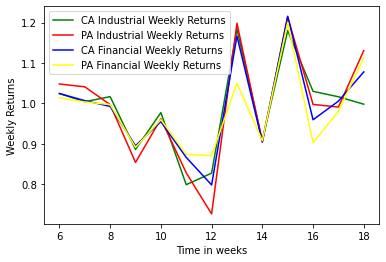

In [15]:

CA_Industrials_df = port_returns.loc[(port_returns.state == 'CA') & (port_returns.gsector == 20)]
plt.plot(CA_Industrials_df['week'],CA_Industrials_df['OnePlusR'], color='green', label='CA Industrial Weekly Returns')


PA_Industrials_df = port_returns.loc[(port_returns.state == 'PA') & (port_returns.gsector == 20)]
plt.plot(PA_Industrials_df['week'],PA_Industrials_df['OnePlusR'], color='red', label='PA Industrial Weekly Returns')


CA_Financials_df = port_returns.loc[(port_returns.state == 'CA') & (port_returns.gsector == 40)]
plt.plot(CA_Financials_df['week'],CA_Financials_df['OnePlusR'], color='blue', label='CA Financial Weekly Returns')


PA_Financials_df = port_returns.loc[(port_returns.state == 'PA') & (port_returns.gsector == 40)]
plt.plot(PA_Financials_df['week'],PA_Financials_df['OnePlusR'], color='yellow', label='PA Financial Weekly Returns')

plt.legend()    #makes the labels appear 
plt.xlabel('Time in weeks')
plt.ylabel('Weekly Returns')
plt.show()


<AxesSubplot:xlabel='week'>

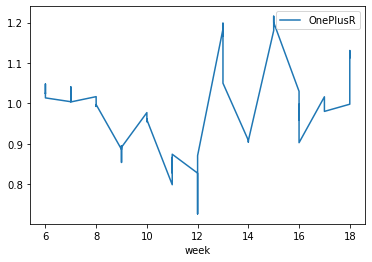

In [71]:
port_returns.plot('week','OnePlusR')